In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
from data_flow import _refine2
import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
import h5py

sc cls: 10, ds cls: 20, sr cls: 4


In [3]:
from data_flow import mutate_to_h5df

In [4]:
start = 0
for i in range(5):
    start = mutate_to_h5df(startId=start)

gsm initialized
total: 64
gsm initialized
total: 64
gsm initialized
total: 64
gsm initialized
total: 64
gsm initialized
total: 64


In [8]:
f = h5py.File('f:/dataset/AgriculturalDisease/trainingset - augmeted.h5', 'w')


[]

## ---

In [5]:
f = h5py.File('f:/dataset/AgriculturalDisease/trainingset - augmeted.h5', 'r')

In [85]:
idx = np.random.choice(32739, 1000)

In [86]:
test_data = { f[str(i)]['img_id'].value: [ (str(i), f[str(i)]['lb'].value, f[str(i)]['feat'].value) ] for i in idx }

# test_data --> { img_id: [ (control_id, lb, feat) * N ] }

In [87]:
count = 0

for i in range(32739,5*32739):
    k = str(i)
    gp = f[k]
    img_id = gp['img_id'].value
    
    if img_id in test_data.keys():
        lb = gp['lb'].value
        feat = gp['feat'].value
        data = (k, lb, feat)
        
        test_data[img_id].append(data)
        count += 1
    
    if i % 10000 == 0:
        print('got', count, end='\r')

print(count)

39123813


In [94]:
list(gp.keys())

['feat', 'img_id', 'lb']

In [91]:
count/4

978.0

In [92]:
def validation(d):
    idx, lb, feat = d[0]
    for j in range(1,5):
        i, l, f = d[j]
        assert(l == lb)
        assert(np.mean(f-feat) != 0 )

In [93]:
for k, v in test_data.items():
    validation(v)

In [ ]:
with h5py.File('f:/dataset/AgriculturalDisease/trainingset - augmeted.h5', 'r') as f:
    for idx in rand_idx:
        indeces = [str(idx + n*32739) for n in range(1, 5)]
        gp = f[str(idx)]
        sr, sp, ds, full_lb, feat, image_id = [gp[k].value for k in ('sr', 'sp', 'ds', 'full_lb', 'feat', 'image_id')]
        print(sr)
        for i in indeces:
            gp = f[i]
            
            assert (gp['image_id'].value == image_id), 'image_id'
            print(gp['sr'].value)
#             assert ((gp['sr'].value == sr).all()), 'sr'
#             assert ((gp['ds'].value == ds).all()), 'ds'
#             assert ((gp['sp'].value == sp).all()), 'sp'
#             assert ((gp['full_lb'].value == full_lb).all()), 'full_lb'

#             assert (np.sum(gp['feat'].value - feat) != 0), 'feat'
        print()    
            

---
## test ImageDataGenerator

In [5]:
import h5py
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from data_flow import _refine2
import data_flow
from os import path

ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

In [3]:
basedir = 'F:/dataset/AgriculturalDisease/trainingset/'
img_paths = glob(path.join(basedir, 'images', '*'))

In [4]:
batch_paths = img_paths[123:123+256]

In [8]:
data = np.array([_refine2(p) for p in batch_paths])

In [13]:
idg = ImageDataGenerator(fill_mode='constant', width_shift_range=0.15,
                                height_shift_range=0.15, rotation_range=360,
                                vertical_flip=True, horizontal_flip=True)

(256, 256, 256, 3)

In [22]:
rd_idx

array(['56421a33-a42d-4c4f-8f68-03f458deb53f___YLCV_NREC 2072.JPG',
       '65fac2d5c725725135d6a966ce98e0db.jpg',
       '8af21eff7560459a2d1a67788a3ef306.jpg',
       'b9ef76acf09bcd49a9e288d69d6b44f1.jpg',
       'cf5af250894cb3e8e58478b83979a604 - 副本.jpg',
       '5f9bfe32638972e82580d0a3bb1615ee.jpg',
       'aa018cd21e31f4b02a0de911bfd68fa9.jpg',
       'fa70e9bcf244e365f1c657377aba840a.jpg',
       '0fa71ecbbdbcdc5f9f22ed86c8da7e7d.jpg',
       'c14de83a-b7e7-45fa-8d85-fbe3e5a4ce4a___YLCV_GCREC 5338.JPG'],
      dtype='<U64')

In [8]:
l, b = x

In [11]:
from PIL import Image
from data_flow import _refine, _refine2
import matplotlib.pyplot as plt

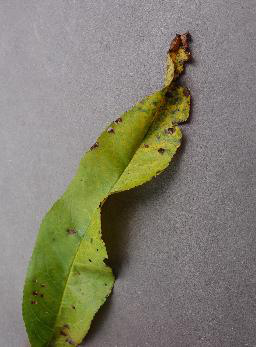

In [8]:
Image.open('f:/dataset/AgriculturalDisease/testA/images/00ec2d81-1ac8-464f-af9f-40e8c28d67eb___Rutg._Bact.S 2002.jpg')

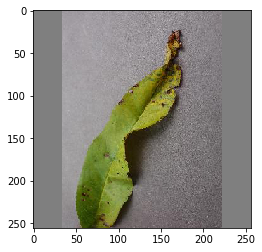

In [12]:
data = _refine2('f:/dataset/AgriculturalDisease/testA/images/00ec2d81-1ac8-464f-af9f-40e8c28d67eb___Rutg._Bact.S 2002.jpg')
plt.imshow(data/2+0.5)